In [29]:
import quandl 
from datetime import datetime
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns 
from dateutil.relativedelta import relativedelta

In [8]:
#This is the value of our api key
API_KEY= '28ay14gN1-yckyyq6tBi'

In [40]:
# every single stock has its own unique code and while we fetch our data this is the code that I found for the task
BPCL_code = 'BSE/BOM500547'

In [193]:
#Here we are getting the values for the start date and the end date for which we want the data
#As mentioned in the requirements we need the data for the past 5 years so our start date will be current - 5 
CURRENT_DATE = datetime.now()
START_DATE = CURRENT_DATE - relativedelta(years = 10)
START_DATE = datetime.strftime(START_DATE , '%Y-%m-%d')
CURRENT_DATE = datetime.strftime(CURRENT_DATE, '%Y-%m-%d')
START_DATE , CURRENT_DATE

('2013-02-01', '2023-02-01')

In [194]:
quandl.ApiConfig.api_key = API_KEY
bpcl_df = quandl.get(BPCL_code, start_date= START_DATE, end_date=CURRENT_DATE)

In [195]:
bpcl_df.tail()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2023-01-25,348.95,350.45,345.60,346.60,347.87,44508.0,1650.0,15482845.0,16564.0,37.22,4.85,-2.35
2023-01-27,346.00,349.35,331.75,336.70,338.32,73625.0,2589.0,24908761.0,24956.0,33.90,17.60,-9.30
2023-01-30,336.10,339.30,332.35,335.05,335.26,169164.0,3968.0,56713442.0,44601.0,26.37,6.95,-1.05
2023-01-31,341.90,351.50,341.65,343.25,345.63,174047.0,4448.0,60156085.0,58483.0,33.60,9.85,1.35
2023-02-01,340.05,344.65,330.10,334.20,337.86,184604.0,6247.0,62370305.0,NaN,NaN,14.55,-5.85


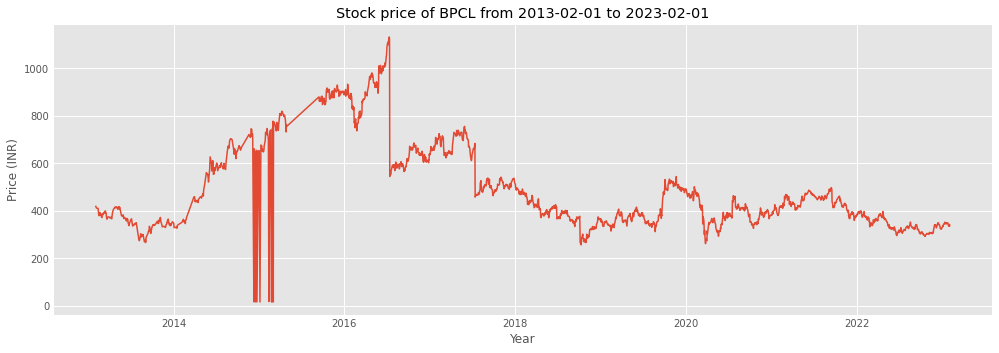

In [196]:
plt.style.use('ggplot')
plt.figure(figsize =[15,5] )
plt.plot(bpcl_df.index , bpcl_df['Close']  , linewidth = 1.5)
plt.xlabel('Year')
plt.ylabel('Price (INR)')
# plt.grid(visible = True)
plt.title(f'Stock price of BPCL from {START_DATE} to {CURRENT_DATE}')
plt.show()

In [206]:
bpcl_df['changepct']= bpcl_df['Close'].pct_change().map(lambda x: -x if x < 0 else x)

In [207]:
meanchange = bpcl_df['changepct'].mean()
changestd = bpcl_df['changepct'].std()

In [208]:
bpcl_df['changepct'].mean()

0.15087096306932904

In [209]:
upperfence = meanchange + 3*changestd
lowerfence = meanchange - 3*changestd
filterdf = (bpcl_df['changepct'] > upperfence) | (bpcl_df['changepct'] < lowerfence)

In [210]:
bpcl_df[filterdf]

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,changepct
Date,,,,,,,,,,,,,
2014-12-11,671.50,680.00,658.50,661.45,665.63,262541.0,8558.0,174754749.0,133059.0,50.68,21.50,-10.05,38.023599
2014-12-22,649.00,657.35,645.10,655.40,650.87,80316.0,3037.0,52275470.0,36922.0,45.97,12.25,6.40,36.884393
2014-12-30,649.30,657.55,645.25,649.80,651.54,66100.0,3708.0,43066841.0,12721.0,19.25,12.30,0.50,36.779070
2015-01-09,678.00,688.30,673.40,677.35,681.20,126219.0,7653.0,85980882.0,28718.0,22.75,14.90,-0.65,39.559880
2015-02-16,728.10,757.05,721.20,726.20,740.77,209270.0,14416.0,155021700.0,40801.0,19.50,35.85,-1.90,38.574932
2015-02-26,751.05,758.40,742.00,744.85,747.21,90356.0,5447.0,67514608.0,22302.0,24.68,16.40,-6.20,44.836923
2015-03-04,783.50,789.05,764.00,769.90,779.67,116112.0,7918.0,90529437.0,31726.0,27.32,25.05,-13.60,45.519637
